In [1]:
import numpy as np
import pandas as pd
import sklearn
from pathlib import Path
import matplotlib.pyplot as plt
import re
from utils import *

pd.set_option('future.no_silent_downcasting', True)

In [2]:
path_data = Path("../data")

In [3]:
all_data = pd.read_pickle(path_data / "analysis_with_nan.pickle")
tractor_data = pd.read_pickle(path_data / "operator_with_nan.pickle")

In [4]:
all_data.sample(3)

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Обор.двиг.,об/мин",КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Дата и время,target
1765432,0.0,440.0,1663.375,1264.0,9.0,440.0,73.0,760.0,27.75,1663.375,2023-07-18 00:03:22,2
1431072,0.0,380.0,1916.250,1264.0,0.0,380.0,94.0,824.0,27.95,1916.250,2023-07-17 12:45:25,2
1331016,0.0,500.0,1911.625,1280.0,NaN,500.0,69.0,808.0,28.25,1911.625,2023-07-16 08:57:46,2


In [5]:
tractor_data.sample(3)

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Обор.двиг.,об/мин",КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Дата и время,tractor_type
1327685,0.0,328.0,1151.625,1136.0,0.0,328.0,75.0,NaN,27.4,1151.625,2023-07-27 01:13:10,С2586
1262999,0.0,520.0,1893.000,1200.0,10.2,520.0,76.0,704.0,NaN,1893.000,2023-07-26 01:44:45,С2586
82882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,NaN,2023-05-21 06:33:33,С2177


In [6]:
all_data.nunique()

Полож.пед.акселер.,%                          298
Давл.масла двиг.,кПа                         1501
Обор.двиг.,об/мин                           15532
КПП. Давление масла в системе смазки         3001
Скорость                                      597
ДВС. Давление смазки                         1601
ДВС. Температура охлаждающей жидкости         151
Давление в пневмостистеме (spn46), кПа        979
Электросистема. Напряжение                    258
ДВС. Частота вращения коленчатого вала      15579
Дата и время                              2522344
target                                          3
dtype: int64

In [7]:
tractor_data.nunique()

Полож.пед.акселер.,%                          251
Давл.масла двиг.,кПа                          177
Обор.двиг.,об/мин                           12268
КПП. Давление масла в системе смазки           88
Скорость                                      595
ДВС. Давление смазки                          177
ДВС. Температура охлаждающей жидкости         108
Давление в пневмостистеме (spn46), кПа         84
Электросистема. Напряжение                    240
ДВС. Частота вращения коленчатого вала      12322
Дата и время                              2358528
tractor_type                                   14
dtype: int64

In [8]:
tractor_data.shape, all_data.shape

((2666861, 12), (2856565, 12))

In [9]:
all_data.isna().sum()

Полож.пед.акселер.,%                       44211
Давл.масла двиг.,кПа                       44570
Обор.двиг.,об/мин                          47735
КПП. Давление масла в системе смазки      203269
Скорость                                  154189
ДВС. Давление смазки                       44571
ДВС. Температура охлаждающей жидкости      50442
Давление в пневмостистеме (spn46), кПа    183215
Электросистема. Напряжение                553611
ДВС. Частота вращения коленчатого вала     43516
Дата и время                                   0
target                                         0
dtype: int64

In [10]:
tractor_data.isna().sum()

Полож.пед.акселер.,%                       44211
Давл.масла двиг.,кПа                       44570
Обор.двиг.,об/мин                          47735
КПП. Давление масла в системе смазки      203269
Скорость                                  154189
ДВС. Давление смазки                       44571
ДВС. Температура охлаждающей жидкости      50442
Давление в пневмостистеме (spn46), кПа    183215
Электросистема. Напряжение                553611
ДВС. Частота вращения коленчатого вала     43516
Дата и время                                   0
tractor_type                                   0
dtype: int64

In [11]:
# all_data.drop_duplicates(inplace=True, ignore_index=True)
# tractor_data.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
tractor_data.shape, all_data.shape

((2666861, 12), (2856565, 12))

In [12]:
data = pd.merge(all_data,
    tractor_data, 
    on=['Полож.пед.акселер.,%', 'Давл.масла двиг.,кПа', 'Обор.двиг.,об/мин',
        'КПП. Давление масла в системе смазки', 'Скорость',
        'ДВС. Давление смазки', 'ДВС. Температура охлаждающей жидкости',
        'Давление в пневмостистеме (spn46), кПа', 'Электросистема. Напряжение',
        'ДВС. Частота вращения коленчатого вала', 'Дата и время'],
    how="inner")

In [14]:
data.bfill(inplace=True)
data.ffill(inplace=True)

In [13]:
data["target"].unique()

array([0, 2])

In [16]:
data.shape

(2623314, 13)

In [17]:
data.sample(3)

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Обор.двиг.,об/мин",КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Дата и время,target,tractor_type
216542,1.2,140.0,719.000,544.0,1.2,140.0,72.0,808.0,28.15,719.000,2023-06-06 04:58:37,0,C1969
2515532,0.0,520.0,1911.000,1216.0,0.0,520.0,74.0,768.0,27.50,1911.000,2023-08-17 23:19:07,2,С2586
253103,0.0,180.0,653.625,1168.0,0.0,180.0,72.0,808.0,28.25,653.625,2023-06-07 07:32:17,0,C1969


In [14]:
data.sort_values(["tractor_type", "target", "Дата и время"], ignore_index=True, axis=0, inplace=True)

In [15]:
data["tractor_type"].unique()

array(['022C4097', '023T0569', '023Т0049', '023Т0255', '023Т0719',
       'C1969', 'Р3106', 'С0790', 'С0873', 'С1067', 'С1178', 'С2177',
       'С2586', 'С2627 7226ом61'], dtype=object)

In [16]:
for tractor in data["tractor_type"].unique():
    print(tractor, data[data["tractor_type"] == tractor]["target"].unique())

022C4097 [0]
023T0569 [0]
023Т0049 [0]
023Т0255 [2]
023Т0719 [0]
C1969 [0]
Р3106 [2]
С0790 [2]
С0873 [2]
С1067 [2]
С1178 [2]
С2177 [0]
С2586 [2]
С2627 7226ом61 [0]


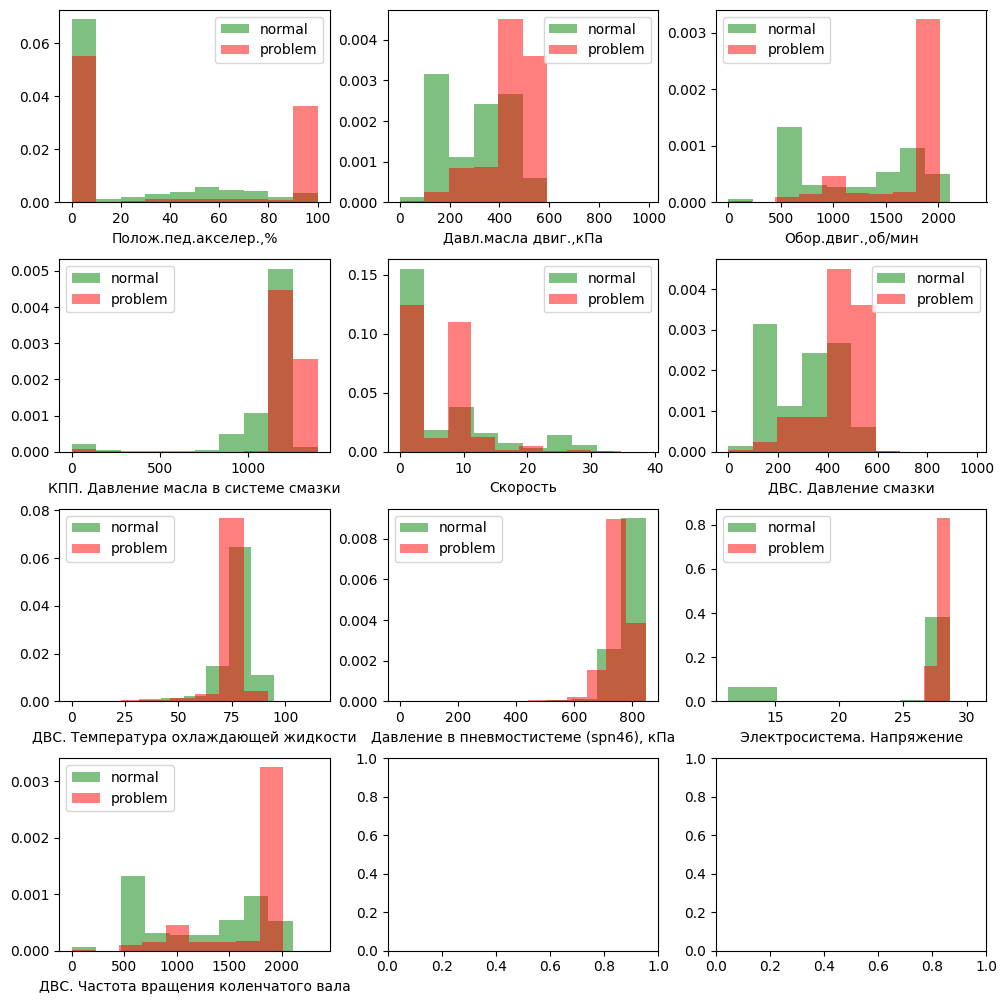

In [17]:
fig, axis = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
fig.tight_layout(h_pad=2)

for i, num_col in enumerate(numeric_cols):
    row = i // 3
    col = i % 3
    df_target_0 = data.loc[data["target"] == 0, num_col]
    df_target_2 = data.loc[data["target"] == 2, num_col]
    axis[row][col].hist(df_target_0, alpha=0.5, label="normal", density=True, color="green")
    axis[row][col].hist(df_target_2, alpha=0.5, label='problem', density=True, color="red")
    axis[row][col].legend()
    axis[row][col].set_xlabel(num_col)

In [22]:
data.sort_values("Дата и время", inplace=True, ignore_index=True)

In [23]:
data["Дата и время"].nunique() ,data.shape

(2358528, (2623314, 13))